<a href="https://colab.research.google.com/github/AndreaCedenoR/Clasificaci-n-lineal-binaria/blob/main/IAAA_P1_Cede%C3%B1oReis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

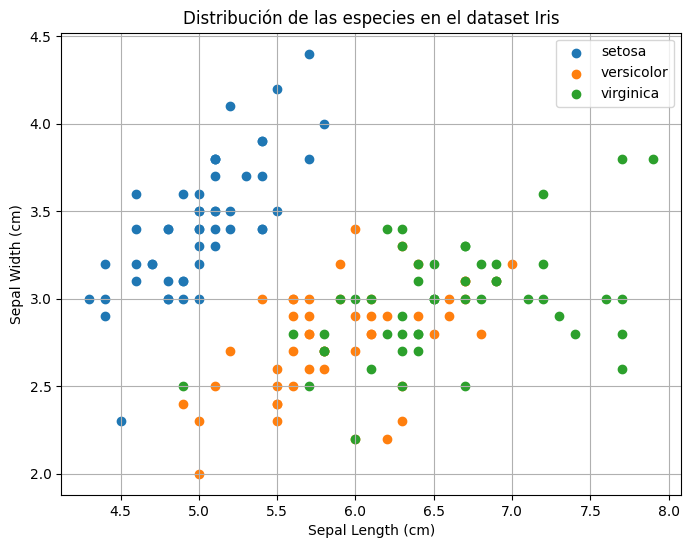

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Graficar setosa, versicolor y virginica
plt.figure(figsize=(8,6))
for especie in iris.target_names:
    subset = df[df['species'] == especie]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=especie)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Distribución de las especies en el dataset Iris")
plt.legend()
plt.grid(True)
plt.show()


Aquí se filtra el DataFrame df para quedarme solo con las filas de las especies setosa y versicolor.
Luego se selecciona dos columnas del DataFrame: sepal length y sepal width.
X es un arreglo que contiene esas características para cada flor.

In [ ]:
# Filtrar solo dos clases: setosa y versicolor
binary_df = df[df['species'].isin(['setosa', 'versicolor'])]

# Usar solo sepal length y sepal width
X = binary_df[['sepal length (cm)', 'sepal width (cm)']].values

# Convertir etiquetas: setosa = 0, versicolor = 1
y = binary_df['species'].apply(lambda s: 0 if s == 'setosa' else 1).values


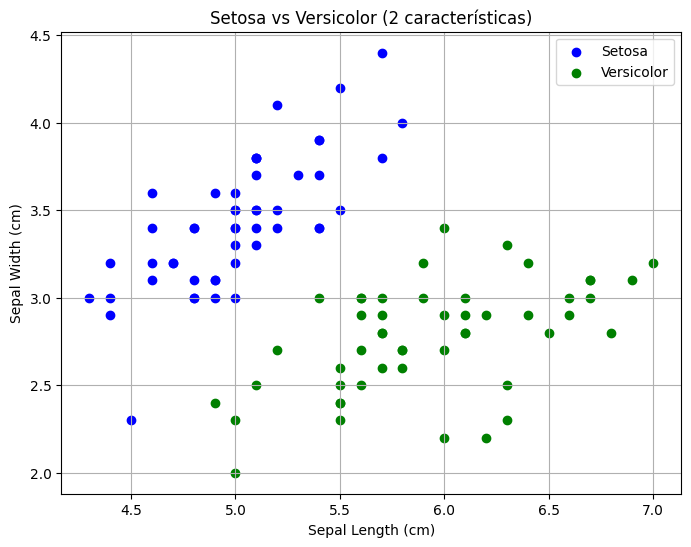

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], label='Setosa', color='blue')
plt.scatter(X[y==1][:,0], X[y==1][:,1], label='Versicolor', color='green')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Setosa vs Versicolor (2 características)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Calcular distancia a cada punto de entrenamiento
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            # Votar por la clase más común
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)


Este código define una clase de clasificador K-Nearest Neighbors (KNN).
Se define un clasificador con un parámetro k, que indica cuántos vecinos usar para la votación.
Este método guarda los datos de entrenamiento. KNN no necesita "entrenamiento" real, solo memoriza los datos (fit).
Calcula la distancia Euclidiana entre dos puntos.
Para cada punto de prueba (X_test), calcula las distancias a todos los puntos de entrenamiento.
Toma los k vecinos más cercanos (k_indices).
Usa Counter para hacer una votación mayoritaria y asignar una clase al nuevo punto.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Probar diferentes valores de K
k_range = range(1, 10)
accuracies = []

for k in k_range:
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_k = k_range[np.argmax(accuracies)]
print(f"Mejor valor de K: {best_k}")


Mejor valor de K: 1


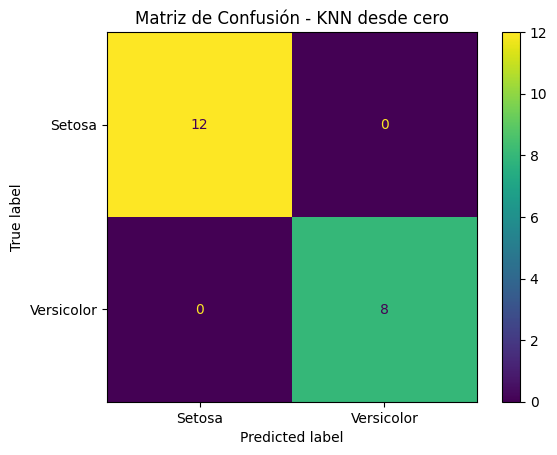

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Entrenar con el mejor K
knn_best = KNNClassifier(k=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Mostrar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Setosa", "Versicolor"])
disp.plot()
plt.title("Matriz de Confusión - KNN desde cero")
plt.show()


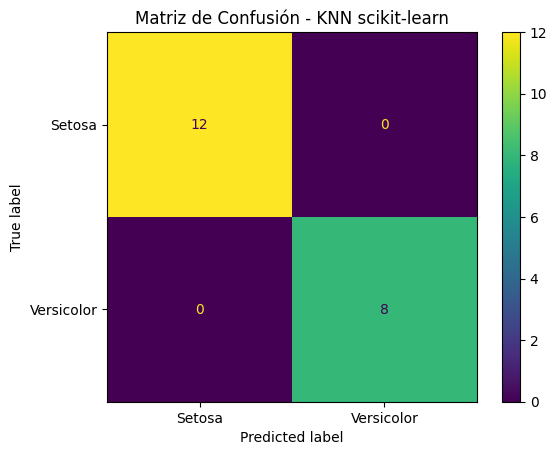

Precisión (implementación propia): 1.00
Precisión (scikit-learn): 1.00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Usar el mismo K
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

# Matriz de confusión
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
disp2 = ConfusionMatrixDisplay(cm_sklearn, display_labels=["Setosa", "Versicolor"])
disp2.plot()
plt.title("Matriz de Confusión - KNN scikit-learn")
plt.show()

# Comparar precisión
acc_manual = accuracy_score(y_test, y_pred)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Precisión (implementación propia): {acc_manual:.2f}")
print(f"Precisión (scikit-learn): {acc_sklearn:.2f}")
